 1.  Configuración y Carga de Datos

In [11]:
import pandas as pd

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Leemos los datos directamente desde la URL
df_anidado = pd.read_json(url)

# Usamos json_normalize para aplanar toda la estructura en un único DataFrame
df = pd.json_normalize(df_anidado.to_dict('records'))

# Mostramos las primeras 5 filas para una verificación rápida
print("✅ Datos cargados y aplanados exitosamente. Vista previa:")
display(df.head())

✅ Datos cargados y aplanados exitosamente. Vista previa:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


2.1 Diagnostico inicial

In [12]:
# Obtenemos un resumen técnico de los datos aplanados
print("\nResumen técnico del DataFrame:")
df.info()


Resumen técnico del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSup

2.2 Correcion de la columna

In [13]:
# Convertimos la columna a un formato numérico.
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Rellenamos los valores nulos con 0.
df['account.Charges.Total'].fillna(0, inplace=True)

# Verificamos que la corrección fue exitosa
print("\n✅ Verificación post-limpieza de 'account.Charges.Total':")
df.info()


✅ Verificación post-limpieza de 'account.Charges.Total':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   obj

/tmp/ipython-input-13-3150609061.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(0, inplace=True)


2.3. Verificación y Corrección de Otras Inconsistencias

2.3.1. Verificación de Filas Duplicadas

In [14]:
# Contamos el número total de filas duplicadas
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas encontradas: {duplicados}")

Número de filas duplicadas encontradas: 0


2.3.2. Verificación de Valores en Columnas Categóricas

In [15]:
# Seleccionamos solo las columnas de tipo 'object'
columnas_categoricas = df.select_dtypes(include=['object']).columns

print("\nValores únicos en columnas categóricas:")
for columna in columnas_categoricas:
  # Omitimos la columna de ID para no llenar la pantalla
  if 'ID' not in columna:
    print(f"- {columna}: {df[columna].unique()}")


Valores únicos en columnas categóricas:
- Churn: ['No' 'Yes' '']
- customer.gender: ['Female' 'Male']
- customer.Partner: ['Yes' 'No']
- customer.Dependents: ['Yes' 'No']
- phone.PhoneService: ['Yes' 'No']
- phone.MultipleLines: ['No' 'Yes' 'No phone service']
- internet.InternetService: ['DSL' 'Fiber optic' 'No']
- internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
- internet.OnlineBackup: ['Yes' 'No' 'No internet service']
- internet.DeviceProtection: ['No' 'Yes' 'No internet service']
- internet.TechSupport: ['Yes' 'No' 'No internet service']
- internet.StreamingTV: ['Yes' 'No' 'No internet service']
- internet.StreamingMovies: ['No' 'Yes' 'No internet service']
- account.Contract: ['One year' 'Month-to-month' 'Two year']
- account.PaperlessBilling: ['Yes' 'No']
- account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


2.3.3. Aplicando la Corrección

In [16]:
# Filtramos el DataFrame para mantener solo las filas donde 'Churn' no es un string vacío
df = df[df['Churn'] != '']

# Verificamos que la corrección fue exitosa, mostrando los valores únicos de nuevo
print("✅ Verificación post-corrección de 'Churn':")
print(f"Valores únicos en Churn: {df['Churn'].unique()}")

✅ Verificación post-corrección de 'Churn':
Valores únicos en Churn: ['No' 'Yes']


3. Creación de Nuevas Columnas (Feature Engineering)

3.1. Cálculo de Cuentas Diarias

In [19]:
# Usamos el nombre de columna correcto de la lista que proporcionaste
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

# Verificamos la creación de la nueva columna
print("✅ Columna 'Cuentas_Diarias' creada. Vista previa:")
display(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

✅ Columna 'Cuentas_Diarias' creada. Vista previa:


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


4. Estandarización y Transformación

4.1. Conversión de Columnas Binarias (Sí/No a 1/0)

In [20]:
# Lista de columnas a transformar
columnas_binarias = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'account.PaperlessBilling'
]

# Creamos un diccionario para el reemplazo
mapeo = {'Yes': 1, 'No': 0}

# Aplicamos el reemplazo en todas las columnas de la lista
for columna in columnas_binarias:
  df[columna] = df[columna].replace(mapeo)

# Verificamos los cambios en algunas de las columnas
print("✅ Columnas binarias transformadas. Vista previa:")
display(df[['Churn', 'customer.Partner']].head())

✅ Columnas binarias transformadas. Vista previa:


/tmp/ipython-input-20-4191283487.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columna] = df[columna].replace(mapeo)


,Churn,customer.Partner
0,0,1
1,0,0
2,1,0
3,1,1
4,1,1


4.2. Renombrar Columnas para Mayor Claridad

In [21]:
# Creamos un diccionario con los nombres nuevos
nuevos_nombres = {
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'es_adulto_mayor',
    'customer.Partner': 'tiene_pareja',
    'customer.Dependents': 'tiene_dependientes',
    'customer.tenure': 'antiguedad_meses',
    'phone.PhoneService': 'tiene_servicio_telefonico',
    'phone.MultipleLines': 'tiene_multiples_lineas',
    'internet.InternetService': 'servicio_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'contrato',
    'account.PaperlessBilling': 'facturacion_online',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'cargos_mensuales',
    'account.Charges.Total': 'cargos_totales'
}

# Renombramos las columnas usando el diccionario
df.rename(columns=nuevos_nombres, inplace=True)

# Verificamos los nuevos nombres de columnas
print("\n✅ Columnas renombradas. Vista previa:")
display(df.head())


✅ Columnas renombradas. Vista previa:


,customerID,Churn,genero,es_adulto_mayor,tiene_pareja,tiene_dependientes,antiguedad_meses,tiene_servicio_telefonico,tiene_multiples_lineas,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,contrato,facturacion_online,metodo_pago,cargos_mensuales,cargos_totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


5. Análisis Descriptivo

5.1. Análisis de Variables Numéricas

In [22]:
# Generamos el resumen estadístico para las variables numéricas
resumen_numerico = df.describe().T

print("✅ Resumen estadístico de variables numéricas:")
display(resumen_numerico)

✅ Resumen estadístico de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.000000,0.000000,0.000,1.000,1.000000
es_adulto_mayor,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.000,1.000000
tiene_pareja,7043.0,0.483033,0.499748,0.000000,0.000000,0.000,1.000,1.000000
tiene_dependientes,7043.0,0.299588,0.458110,0.000000,0.000000,0.000,1.000,1.000000
antiguedad_meses,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.000,72.000000
tiene_servicio_telefonico,7043.0,0.903166,0.295752,0.000000,1.000000,1.000,1.000,1.000000
facturacion_online,7043.0,0.592219,0.491457,0.000000,0.000000,1.000,1.000,1.000000
cargos_mensuales,7043.0,64.761692,30.090047,18.250000,35.500000,70.350,89.850,118.750000
cargos_totales,7043.0,2279.734304,2266.794470,0.000000,398.550000,1394.550,3786.600,8684.800000
Cuentas_Diarias,7043.0,2.158723,1.003002,0.608333,1.183333,2.345,2.995,3.958333


5.2. Análisis de Variables Categóricas

In [23]:
# Generamos el resumen estadístico para las variables categóricas (de tipo 'object')
resumen_categorico = df.describe(include=['object']).T

print("\n✅ Resumen estadístico de variables categóricas:")
display(resumen_categorico)


✅ Resumen estadístico de variables categóricas:


,count,unique,top,freq
customerID,7043,7043,9995-HOTOH,1
genero,7043,2,Male,3555
tiene_multiples_lineas,7043,3,No,3390
servicio_internet,7043,3,Fiber optic,3096
seguridad_online,7043,3,No,3498
backup_online,7043,3,No,3088
proteccion_dispositivo,7043,3,No,3095
soporte_tecnico,7043,3,No,3473
streaming_tv,7043,3,No,2810
streaming_peliculas,7043,3,No,2785


6. Visualización de Datos

6.1. Distribución de la Evasión de Clientes (Churn)

/tmp/ipython-input-25-3071546842.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-25-3071546842.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No (Permaneció)', 'Sí (Canceló)'])


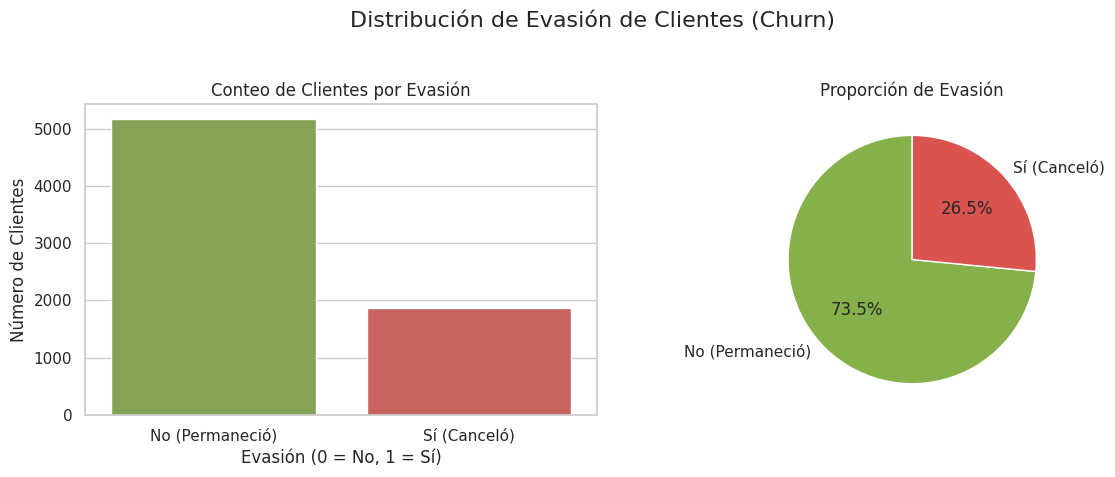

In [25]:
# Importar librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con dos gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distribución de Evasión de Clientes (Churn)', fontsize=16)

# Gráfico de Barras (Conteo)
sns.countplot(
    x='Churn',
    data=df,
    ax=axes[0],
    palette=['#86B049', '#D9534F']
)
axes[0].set_title('Conteo de Clientes por Evasión')
axes[0].set_xlabel('Evasión (0 = No, 1 = Sí)')
axes[0].set_ylabel('Número de Clientes')
axes[0].set_xticklabels(['No (Permaneció)', 'Sí (Canceló)'])

# Gráfico de Torta (Proporción)
churn_counts = df['Churn'].value_counts()
churn_labels = ['No (Permaneció)', 'Sí (Canceló)']
axes[1].pie(
    churn_counts,
    labels=churn_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#86B049', '#D9534F']
)
axes[1].set_title('Proporción de Evasión')

# Mostrar el gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

6.2. Evasión por Variables Categóricas

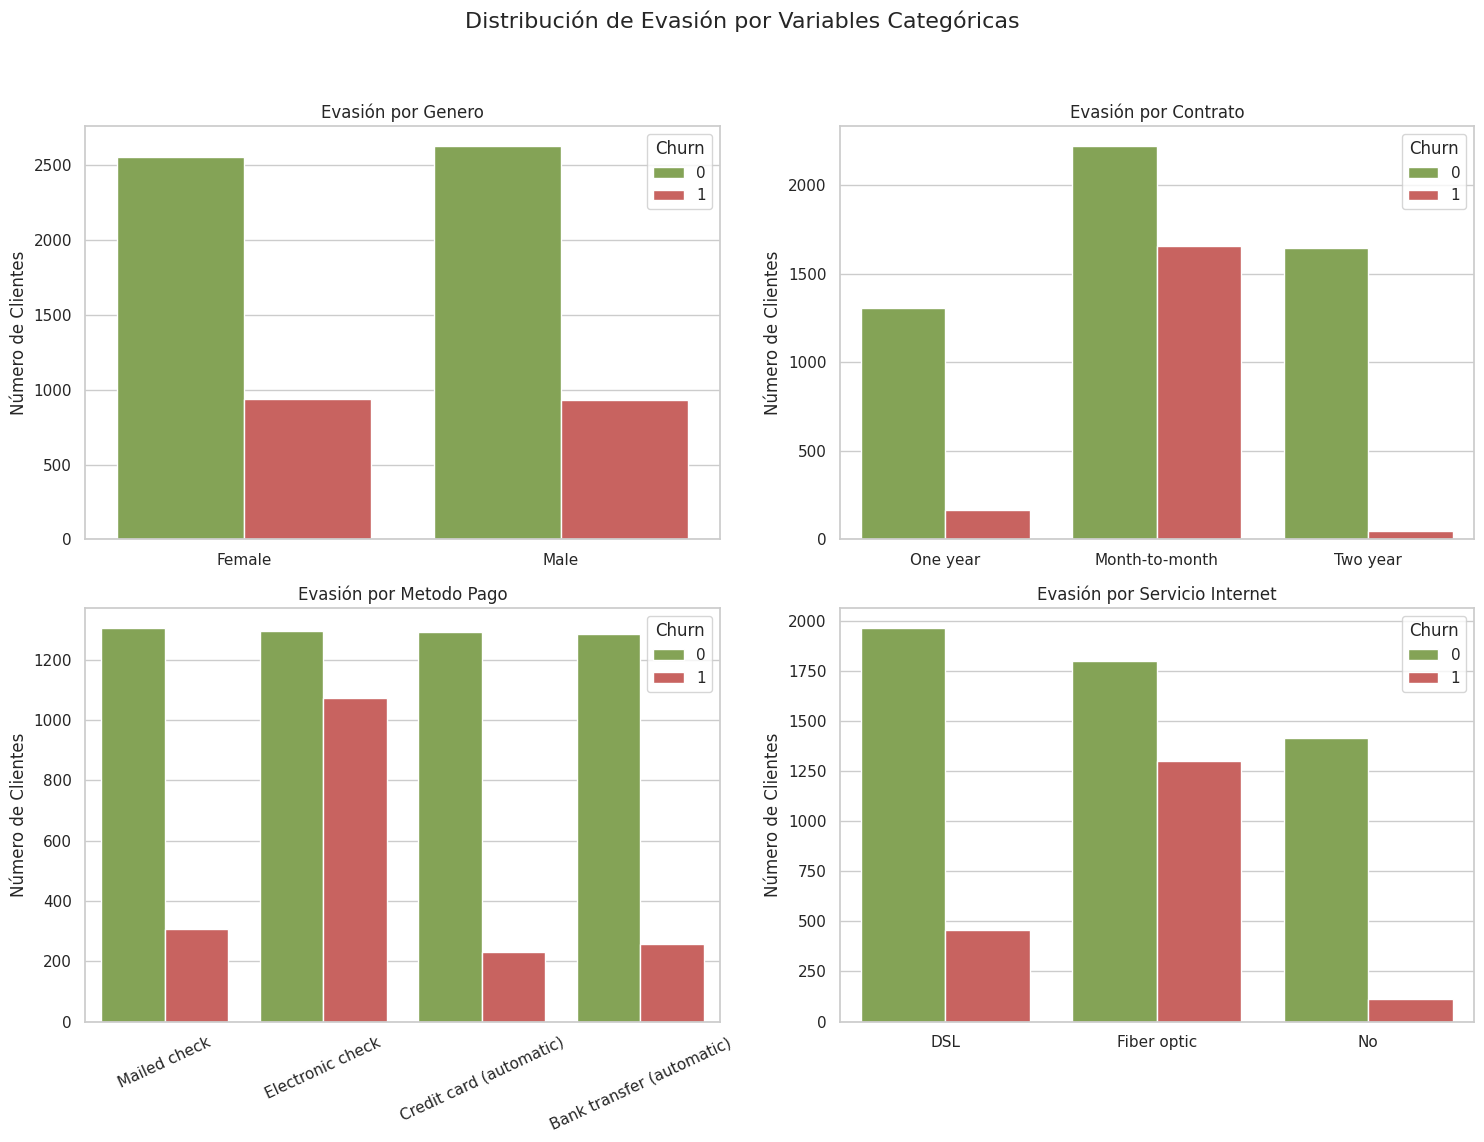

In [26]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set(style="whitegrid")

# Seleccionar las variables categóricas de interés
variables_categoricas = ['genero', 'contrato', 'metodo_pago', 'servicio_internet']

# Crear una cuadrícula de 2x2 para los gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribución de Evasión por Variables Categóricas', fontsize=16)

# Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

# Generar un gráfico para cada variable
for i, variable in enumerate(variables_categoricas):
    sns.countplot(x=variable, hue='Churn', data=df, ax=axes[i], palette=['#86B049', '#D9534F'])
    axes[i].set_title(f'Evasión por {variable.replace("_", " ").title()}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Número de Clientes')
    # Rotar etiquetas si son muy largas
    if len(df[variable].unique()) > 3:
        axes[i].tick_params(axis='x', rotation=25)

# Ajustar y mostrar el gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

6.3. Evasión por Variables Numéricas

/tmp/ipython-input-27-1788507204.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-27-1788507204.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 1].set_xticklabels(['No (Permaneció)', 'Sí (Canceló)'])
/tmp/ipython-input-27-1788507204.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-27-1788507204.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 1].set_xticklabels(['No (Permaneció)', 'Sí (Canceló)'])
/tmp/ipython-input-27-1788507204.py:31: FutureWarning: 


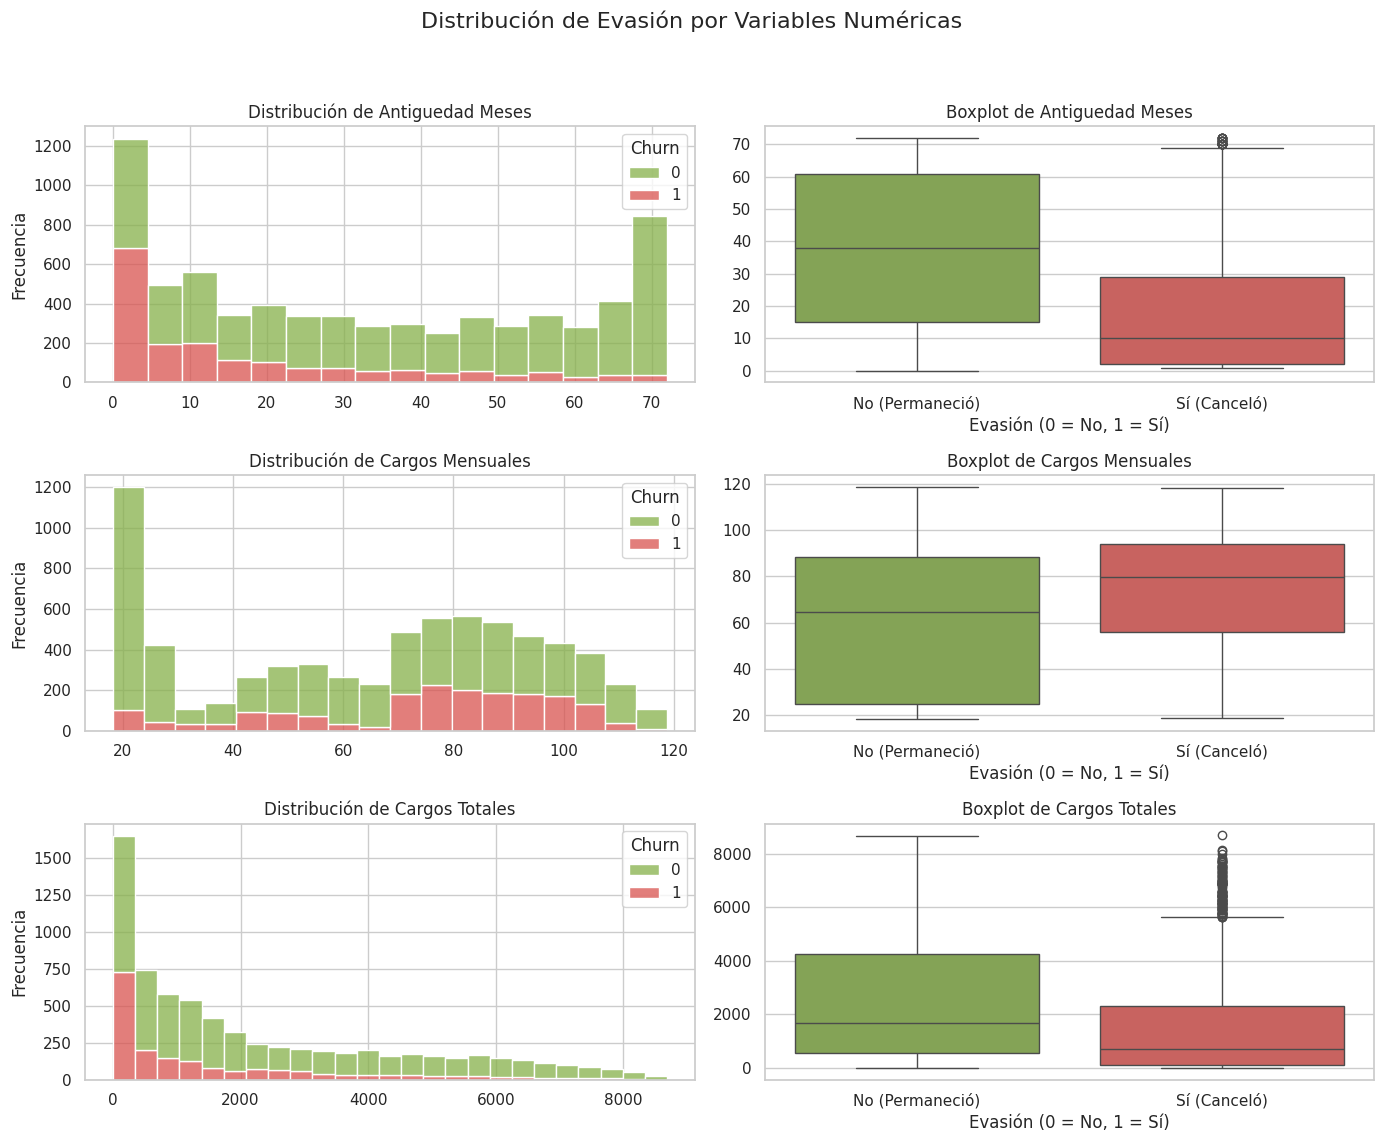

In [27]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set(style="whitegrid")

# Seleccionar las variables numéricas de interés
variables_numericas = ['antiguedad_meses', 'cargos_mensuales', 'cargos_totales']

# Crear una figura para los gráficos
fig, axes = plt.subplots(nrows=len(variables_numericas), ncols=2, figsize=(14, 12))
fig.suptitle('Distribución de Evasión por Variables Numéricas', fontsize=16)

# Generar un par de gráficos (Histograma y Boxplot) para cada variable
for i, variable in enumerate(variables_numericas):
    # Histograma para ver la distribución de frecuencias
    sns.histplot(
        data=df,
        x=variable,
        hue='Churn',
        multiple="stack",
        ax=axes[i, 0],
        palette=['#86B049', '#D9534F']
    )
    axes[i, 0].set_title(f'Distribución de {variable.replace("_", " ").title()}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Frecuencia')

    # Boxplot para comparar medianas y cuartiles
    sns.boxplot(
        data=df,
        x='Churn',
        y=variable,
        ax=axes[i, 1],
        palette=['#86B049', '#D9534F']
    )
    axes[i, 1].set_title(f'Boxplot de {variable.replace("_", " ").title()}')
    axes[i, 1].set_xlabel('Evasión (0 = No, 1 = Sí)')
    axes[i, 1].set_ylabel('')
    axes[i, 1].set_xticklabels(['No (Permaneció)', 'Sí (Canceló)'])


# Ajustar y mostrar el gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Informe Final: Análisis de Evasión de Clientes en Telecom X**

🔹 Introducción

El presente análisis se enfoca en el problema de la evasión de clientes (Churn) en la empresa Telecom X. El objetivo principal es explorar el conjunto de datos de los clientes para identificar los factores y patrones clave que se correlacionan con la decisión de un cliente de cancelar su servicio. La comprensión de estos factores es fundamental para que la empresa pueda desarrollar estrategias de retención efectivas y reducir la pérdida de ingresos.

🔹 Limpieza y Tratamiento de Datos

Para asegurar la calidad y consistencia del análisis, se realizó un riguroso proceso de limpieza y transformación de datos, que incluyó los siguientes pasos:

*Carga y Aplanamiento de Datos:*

 Se cargaron los datos desde un archivo JSON. Dado que la información se encontraba en una estructura anidada, se utilizó la función pandas.json_normalize para aplanar los datos y crear un DataFrame tabular y funcional.

*Corrección de Tipos de Datos:*

 La columna de cargos totales (account.Charges.Total) fue identificada con un tipo de dato incorrecto (object) y contenía valores nulos. Se transformó a un formato numérico y los valores nulos se rellenaron con 0.

*Manejo de Inconsistencias:*

 Se identificaron y eliminaron filas donde la variable objetivo Churn contenía valores vacíos, asegurando que solo trabajáramos con registros completos y válidos.

**Estandarización de Datos:**

Se convirtieron las columnas con respuestas binarias (como 'Yes'/'No') a un formato numérico (1/0) para facilitar los cálculos y la modelización.

Se renombraron todas las columnas a nombres más cortos, intuitivos y en formato snake_case (ej. account.Charges.Monthly a cargos_mensuales) para mejorar la legibilidad del código y los gráficos.

Ingeniería de Características (Feature Engineering): Se creó una nueva columna, Cuentas_Diarias, a partir de los cargos_mensuales para ofrecer una perspectiva adicional del gasto del cliente.

🔹 Análisis Exploratorio de Datos (EDA)

Mediante visualizaciones, se exploraron las relaciones entre diversas variables y la tasa de evasión.

*Distribución General del Churn:*

 Se observó que aproximadamente un 26% de los clientes en el dataset han cancelado el servicio, lo que representa una porción significativa de la base de clientes.

*Evasión por Tipo de Contrato: *

 El análisis reveló que los clientes con contratos mes a mes tienen una tasa de cancelación drásticamente superior en comparación con aquellos con contratos de uno o dos años.

*Evasión por Antigüedad (Tenure):*

 Los gráficos mostraron una clara tendencia: los clientes con menor antigüedad son mucho más propensos a cancelar. La tasa de evasión disminuye a medida que aumenta el tiempo que el cliente permanece en la empresa.

*Evasión por Cargos Mensuales:*

 Se identificó una correlación donde los clientes con cargos mensuales más altos tienden a presentar una mayor tasa de evasión.

🔹 Conclusiones e Insights

El análisis de los datos nos permite extraer las siguientes conclusiones clave:

El tipo de contrato es el predictor más fuerte de Churn. La flexibilidad del contrato mes a mes facilita la cancelación, mientras que los contratos a largo plazo aseguran una mayor retención.

La lealtad se construye con el tiempo. Los primeros meses son críticos para la retención de un cliente. Si un cliente supera la fase inicial, es mucho más probable que permanezca.

El costo es un factor decisivo. Clientes que enfrentan facturas mensuales elevadas son más sensibles y propensos a buscar alternativas.

🔹 Recomendaciones

Basado en las conclusiones anteriores, se proponen las siguientes acciones estratégicas para reducir la tasa de Churn:

Fomentar Contratos a Largo Plazo:

Crear campañas y ofrecer incentivos (descuentos, servicios adicionales) para que los clientes con contratos mes a mes migren a planes de uno o dos años.

Implementar un Programa de Lealtad para Nuevos Clientes:

 Enfocar esfuerzos en los primeros 3-6 meses de vida del cliente, ofreciendo un soporte técnico proactivo, seguimiento personalizado o beneficios exclusivos para fortalecer la relación inicial.

Revisar la Estructura de Precios:

 Analizar los paquetes de servicios de los clientes con cargos mensuales altos que han cancelado. Considerar la creación de paquetes más flexibles o la oferta de descuentos por lealtad para mitigar el impacto del costo.